In [40]:
from datetime import timedelta, datetime
import copy 
import PIL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


import observatories
import data
import events
import analysis
import const
import reference
import correlation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


why more stations better, and sensitivity to tiny time shifts

TODO correlation between those, summed curves 

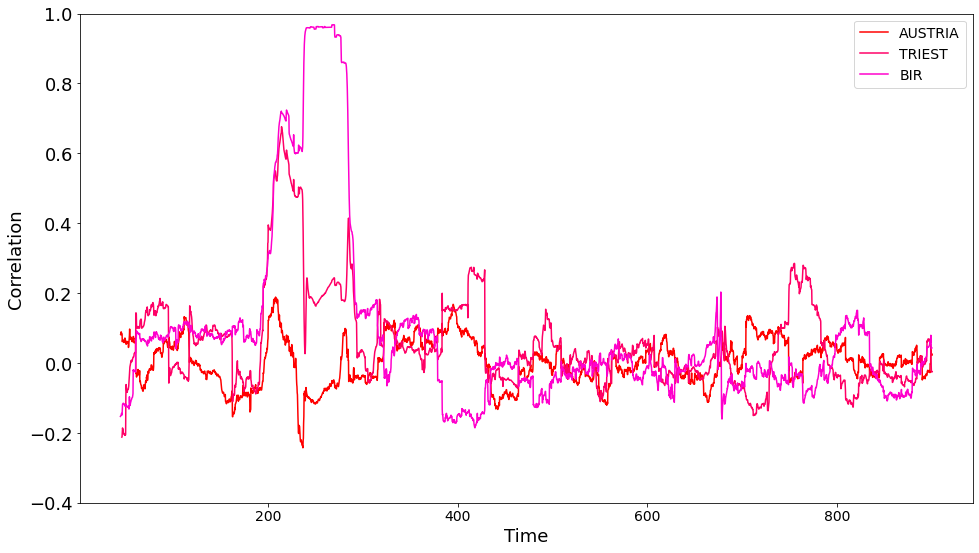

In [24]:
year = 2017
month = 6
day = 1
time = "11:34:00"
obs = [observatories.uni_graz, observatories.austria, observatories.triest, observatories.bir]

curves = []
dps = []
cors = []
for o in obs[1:]:
    dp1 = data.createFromTime(year, month, day, time, obs[0], const.spectral_range)
    dp2 = data.createFromTime(year, month, day, time, o, const.spectral_range)
    dp1.createSummedCurve(const.spectral_range)
    dp2.createSummedCurve(const.spectral_range)
    cor = correlation.Correlation(dp1, dp2, day)
    cor.calculatePeaks()
    curves.append([cor.time_axis, cor.data_curve, o])
    dps.append(dp2)
    cors.append(cor)

dps.append(dp1)

plt.figure(figsize=(16,9))
for j, i in enumerate(curves):
    plt.plot(i[0] ,i[1],label=f"{i[2]}", color=(1, 0, j*0.4))
plt.ylim(-0.4, 1)
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.legend(loc='best')
plt.show()

Locator attempting to generate 1441 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1441 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


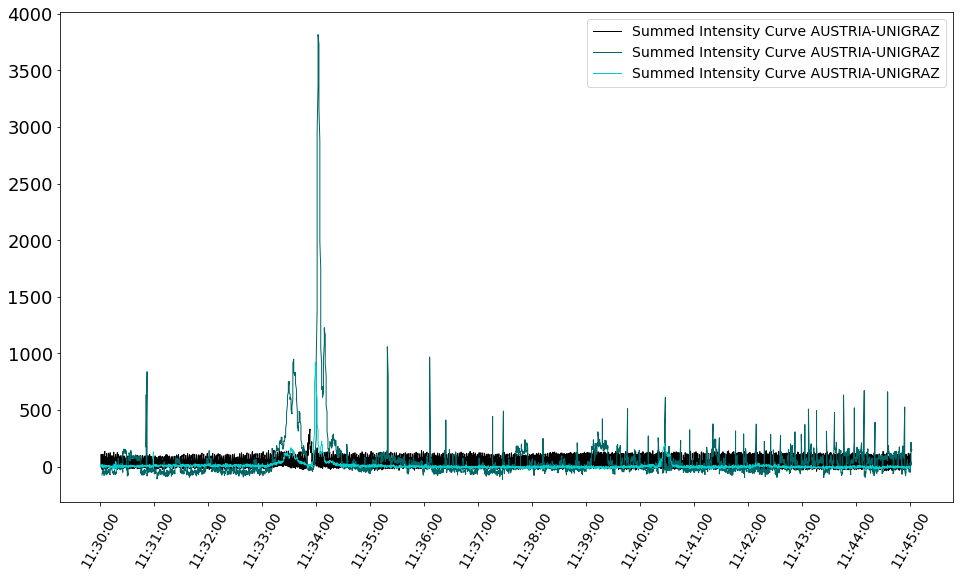

In [44]:
year = 2017
month = 6
day = 1
time = "11:34:00"
obs = [observatories.uni_graz, observatories.austria, observatories.triest, observatories.bir]

curves = []
dps = []
cors = []

fig, ax = plt.subplots(figsize=(16, 9))

ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=60)

for j, o in enumerate(obs[1:]):
    dp1 = data.createFromTime(year, month, day, time, obs[0], const.spectral_range)
    dp2 = data.createFromTime(year, month, day, time, o, const.spectral_range)
    dp1.createSummedCurve(const.spectral_range)
    dp2.createSummedCurve(const.spectral_range)
    dp1.flattenSummedCurve()
    dp2.flattenSummedCurve()
    cor = correlation.Correlation(dp1, dp2, day)

    time_axis_plot2 = []
    _time2 = dp2.spectrum_data.time_axis
    _time_start = cor.time_start
    for i in _time2:
        time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
    time_axis_plot2 = pd.to_datetime(time_axis_plot2)
    dataframe2 = pd.DataFrame()
    dataframe2['data'] = dp2.summedCurve
    dataframe2 = dataframe2.set_index(time_axis_plot2)
    plot_dat = plt.plot(dataframe2, color=(0,j*0.4,j*0.4), linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name}")

plt.legend()
plt.show()

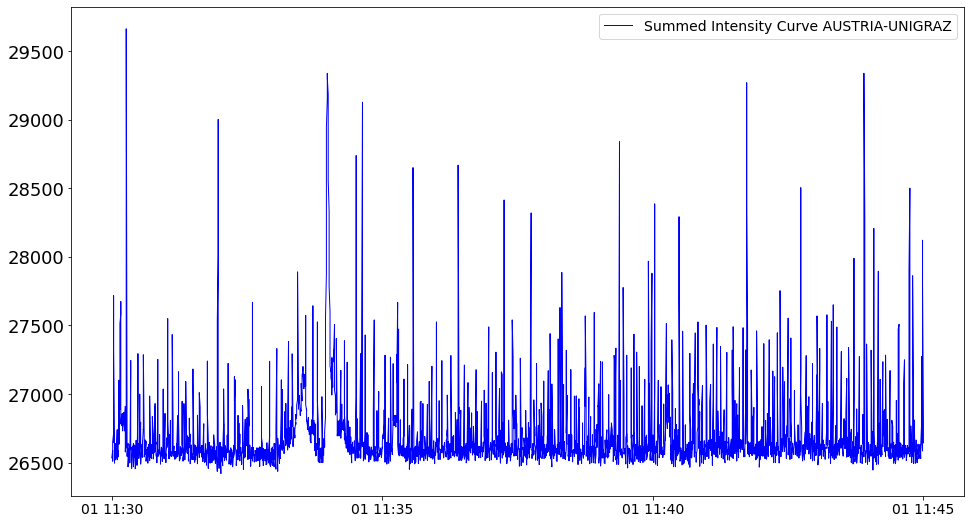

In [32]:
plt.figure(figsize=(16,9))
time_axis_plot2 = []
_time2 = dp1.spectrum_data.time_axis
_time_start = cor.time_start
for i in _time2:
    time_axis_plot2.append(datetime.fromtimestamp(_time_start + i).strftime("%Y %m %d %H:%M:%S"))
time_axis_plot2 = pd.to_datetime(time_axis_plot2)
dataframe2 = pd.DataFrame()
dataframe2['data'] = dp1.summedCurve
dataframe2 = dataframe2.set_index(time_axis_plot2)
plot_dat = plt.plot(dataframe2, color="blue", linewidth=1, label=f"Summed Intensity Curve {dp1.observatory.name}")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


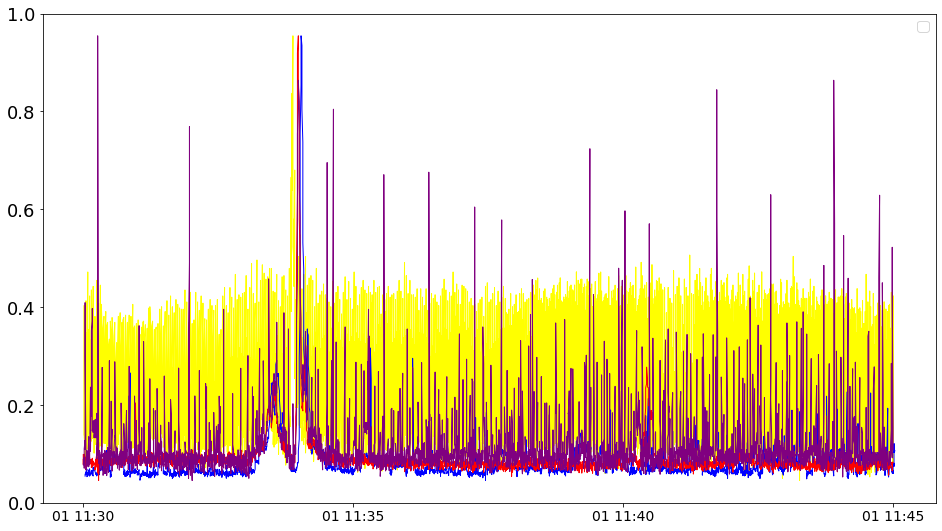

In [27]:
fig, ax = plt.subplots(figsize=(16,9))
for i in dps:
    i.plotSummedCurve(ax, label=i.observatory.name)
plt.legend(loc='best')
plt.show()

mask frequencies

1 with mask, 1 without mask

In [ ]:
year = 2022
month = 1
day = 9
time = "10:12:00"
obs = [observatories.uni_graz, observatories.swiss_landschlacht]

dp1, dp2, cor = analysis.calcPoint(year, month, day, time, obs[0], obs[1])
analysis.plotEverything(dp1,dp2,cor)

dp1, dp2, cor = analysis.calcPoint(year, month, day, time, obs[0], obs[1], mask_frq=True)
analysis.plotEverything(dp1,dp2,cor)

rolling window several curves on top of each other 40 - 100 - 180 - 220 - 260

In [ ]:
year = 2020
month = 12
day = 30
time = "14:26:00"
obs = [observatories.uni_graz, observatories.triest]

r_w = [40, 100, 180, 220, 260]

curves = []
for i in r_w:
    dp1 = data.createFromTime(year, month, day, time, obs[0], const.spectral_range)
    dp2 = data.createFromTime(year, month, day, time, obs[1], const.spectral_range)
    cor = correlation.Correlation(dp1, dp2, day, r_w=i)
    cor.calculatePeaks()
    curves.append([cor.data_curve, i])
    timeaxis = cor.time_axis


for i in curves:
    plt.plot(timeaxis,i[0],label=f"{i/4} s")
plt.ylim(-0.4, 1)
plt.legend(loc='best')
plt.show()